# Fibonacci Fun Times!
---

In this notebook, we'll be exploring all kinds of fun stuff with the Fibonacci sequence (and extensions).

In [21]:
# importing numpy for linear algebra operations, scipy for sparse matrices, pyplot for plotting
import numpy as np
from scipy.sparse import coo_matrix
import matplotlib.pyplot as plt

## Contents
---
[1 Problem description](#1-problem-description)  
[2 Linear recursion principles to the rescue!](#2-Linear-recursion-principles-to-the-rescue!)  
[3 Quadratic formula to the rescue!](#3-Quadratic-formula-to-the-rescue!)  

## 1 Problem description
---
Most of us have run into the Fibonacci sequence *sometime* in our lives, whether as part of a math class, coding class, or coding interview:

$$\{f_n\} = 1, 1, 2, 3, 5, 8, 13, ...$$

In this sequence, after the first and second terms are both given value 1, the rest of the terms follow recursively as the sum of the previous two terms:

$$f_{n+1} = f_n + f_{n-1}$$

Now, writing some code to evaluate the $n^{th}$ term in the sequence isn't too bad if we're allowing $\mathcal{O}(n)$ solutions (where you need to painstakingly sum all the $n$ terms up to the one you want). But what if we *didn't* want to sum all those terms? What if we wanted an $\mathcal{O}(1)$ solution?

[Back to top](#Fibonacci-Fun-Times!)

## 2 Linear recursion principles to the rescue!
---
Let's look at that recursion relation again:

$$f_{n+1} = f_n + f_{n-1}$$

Now, this might seem kind of weird at first, but *what if* we could express each term in the above expression as a power of some unknown root we'll call $r$...what would our expression look like?

$$r^{n+1} = r^{n} + r^{n-1}$$

So how in the world do we know what $r$ is? Well, let's assume for a moment that $r \neq 0$ and we can divide both sides of the above expression by $r^{n-1}$:

$$ r^2 = r + 1 $$

Rearranging, we need to find values for $r$ that satisfy the relation:

$$ r^2 - r - 1 = 0$$

In [ ]:
[Back to top](#Fibonacci-Fun-Times!)

## 3 Quadratic formula to the rescue!
---
As with the Fibonacci sequence - and whether or not we *enjoyed* it - we all also probably encountered the quadratic formula here or there during our math education. We were told (often without knowing *why*, depending on where, when, and by whom you were taught), that a quadratic equation of the form

$$ax^2 + bx + c = 0$$

with $a, b, c$ constants (and $a \neq 0$) has solutions $x_1, x_2$ of the form

$$ x_1, x_2 = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

...but *why is this?* Well, every quadratic function $f(x) = ax^2 + bx + c$ has a certain symmetry to it, as we'll show with some examples below.

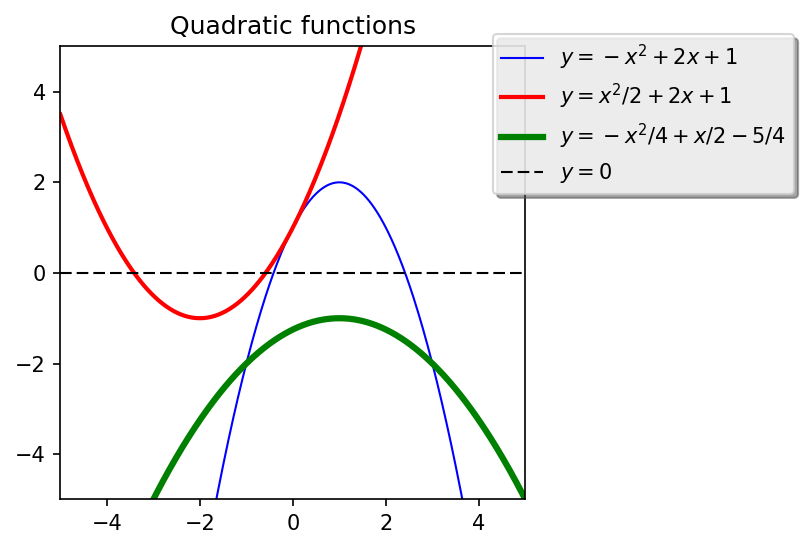

In [107]:
x = np.arange(-5, 5, 0.02)

# y1 = -(x-1)**2 + 2
y1 = -x**2 + 2*x + 1

# y2 = 1/2*((x+2)**2) - 1
y2 = x**2/2 + 2*x + 1

# -1/4*((x-1)**2) - 1
y3 = -1/4*x**2 + 1/2*x - 5/4

# zero baseline
y4 = 0*x

plt.figure(figsize=(4,4), dpi = 150)

lines = plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.setp(lines[0], linewidth=1, color='b')
plt.setp(lines[1], linewidth=2, color='r')
plt.setp(lines[2], linewidth=3, color='g')
plt.setp(lines[3], linewidth=1, color='k', linestyle = '--')

plt.legend(('$y = -x^2 + 2x + 1$', '$y = x^2/2 + 2x + 1$', '$y = -x^2/4 + x/2 - 5/4$', '$y=0$'),
           loc='upper right', bbox_to_anchor=(1.6, 1.05), fancybox=True, shadow=True)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title('Quadratic functions')
plt.show()

## 2 Encoding one letter
---
There are more general ways of constructing Hill cyphers/transformations than what we'll explore today (and you can read more at https://en.wikipedia.org/wiki/Hill_cipher). For our illustration, though, we'll use a simple composition that'll allow us to easily determine a forward (encryption) and inverse (decryption) transformation.

Let's say we want to use the secret key 'mykey' to encrypt the information. Here's one way we can do that.

First, as we did with the 'ibotta' string, let's transform the 'mykey' string into an integer array representation.

```
m -> 12
y -> 24
k -> 10
e -> 4
y -> 24
```

I'm actually going to keep these values as a *row* vector because of how they'll be subsequently used.

In [4]:
keyIntArray = np.array([12, 24, 10, 4, 24])

We'll use these values to start transforming the letters of our 'ibotta' message, one by one. Below is the construction (using sparse matrix logic as a 'helper') of a matrix operator that only transforms the *last* element in our 'ibotta' integer vector.

In [5]:
row    = np.array([5, 5, 5, 5, 5])
col    = np.array([0, 1, 2, 3, 4])
values = keyIntArray

firstTransformation = coo_matrix((values, (row, col)), shape = (6, 6)).toarray() + np.identity(6)
print(firstTransformation)

[[ 1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [12. 24. 10.  4. 24.  1.]]


From what we know about matrix-vector multiplication, the action of this matrix on our message integer vector results in the first five elements being left alone, with the sixth (representing the letter 'a' in 'ibotta') being replaced by its integer representation (0 in the case of 'a') *plus a linear combination of the other integers in the vector*.

In [6]:
print(firstTransformation*messageIntVec0)

[[  8.]
 [  1.]
 [ 14.]
 [ 19.]
 [ 19.]
 [792.]]


The nice thing about our application of linear algebra is that we're interested in transformations between integers *modulo 26*. When reflecting upon how the rest of our mathematics is going to work (have faith for the moment! :) ) we're okay recording results modulo 26 after each operation if we like, e.g.:

In [7]:
messageIntVec1 = firstTransformation*messageIntVec0 % 26
print(messageIntVec1)

[[ 8.]
 [ 1.]
 [14.]
 [19.]
 [19.]
 [12.]]


Taking results modulo 26 also allows us to interpret this result with a transformed *string* representation:

```
 8 -> i
 1 -> b
14 -> o
19 -> t
19 -> t
12 -> m
```

So now our string representation reads 'ibottm'. We can continue similarly - from this result - to encode each of the other letters of our message in turn.

[Back to top](#Hill-Cypher-Encryption)

## 3 Encoding all letters
---
What we'll do now is generalize the pattern we used to construct the first transformation of our message's integer representation in such a way that we can transform *all* the letters of the message.

As we proceed, we'll see how we can multiply individual transformation matrices together into a *single* encryption matrix that transforms all the letters at once (and is equivalent to transforming each individual integer representation in succession).

For our second transformation, we'll encode the fifth character of our six letter string, using a 'rotation' of the transformation we employed first on the *final* character of the string.

In [8]:
row    = np.array([4, 4, 4, 4, 4])
col    = np.array([5, 0, 1, 2, 3])
values = keyIntArray

secondTransformation = coo_matrix((values, (row, col)), shape = (6, 6)).toarray() + np.identity(6)
print(secondTransformation)

[[ 1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [24. 10.  4. 24.  1. 12.]
 [ 0.  0.  0.  0.  0.  1.]]


*This* transformation is expressing the *fifth* 'letter-equivalent-integer' as its current entry *plus* a linear combination of the other entries currently in the string (importantly, we note that we're using this on the string that's already been acted upon by the first transformation).

In [9]:
messageIntVec2 = secondTransformation*messageIntVec1 % 26
print(messageIntVec2)

[[ 8.]
 [ 1.]
 [14.]
 [19.]
 [19.]
 [12.]]


Welp, even though there's been a transformation of the 5th character, it's hard to tell; during this transformation the fifth character was replaced by:

```
character 5 = (24*8 + 10*1 + 4*14 + 24*19 + 1*19 + 12*12) % 26 = 19
```
...so just by chance, we've got another 't' in the fifth position.

Now, I'm going to speed things up a bit and carry out a similar process for the fourth, third, second, and first character in our string (in that order). [*Note: there're certainly more efficient, less hardcoded ways to code this, but since we're dealing with a small array size and introducing a new topic, I'll keep things very expanded and explicit.*]

In [10]:
row    = np.array([3, 3, 3, 3, 3])
col    = np.array([4, 5, 0, 1, 2])
values = keyIntArray

thirdTransformation = coo_matrix((values, (row, col)), shape = (6, 6)).toarray() + np.identity(6)

row    = np.array([2, 2, 2, 2, 2])
col    = np.array([3, 4, 5, 0, 1])
values = keyIntArray

fourthTransformation = coo_matrix((values, (row, col)), shape = (6, 6)).toarray() + np.identity(6)

row    = np.array([1, 1, 1, 1, 1])
col    = np.array([2, 3, 4, 5, 0])
values = keyIntArray

fifthTransformation = coo_matrix((values, (row, col)), shape = (6, 6)).toarray() + np.identity(6)

row    = np.array([0, 0, 0, 0, 0])
col    = np.array([1, 2, 3, 4, 5])
values = keyIntArray

sixthTransformation = coo_matrix((values, (row, col)), shape = (6, 6)).toarray() + np.identity(6)

encodedIntVec = (sixthTransformation*(fifthTransformation*(fourthTransformation*(thirdTransformation*messageIntVec2)))) % 26
print(encodedIntVec)

[[10.]
 [13.]
 [16.]
 [19.]
 [19.]
 [12.]]


The string form of our encoded message is now:

```
10 -> k
13 -> n
16 -> q
19 -> t
19 -> t
12 -> m
```

or 'knqttm'.

[Back to top](#Hill-Cypher-Encryption)

## 4 Encoding all letters simultaneously
---
Another way we can go about the transformation above in one fell swoop is to take all the transformations that went into encoding our integer vector representation and multiply them all together first, in the following order (note that the '@' symbol is a special signifier for numpy to perform traditional (mathematical) matrix multiplication):

In [11]:
compositeTransformation = sixthTransformation @ \
                            fifthTransformation @ \
                            fourthTransformation @ \
                            thirdTransformation @ \
                            secondTransformation @ \
                            firstTransformation % 26
                    
print(compositeTransformation)

[[19. 24.  6. 12. 20. 14.]
 [14.  7.  0. 22.  8. 22.]
 [22. 10. 25. 14. 12.  0.]
 [ 0. 22. 10. 25. 14. 12.]
 [12. 12. 20. 20.  3. 12.]
 [12. 24. 10.  4. 24.  1.]]


We can now use this composite transformation to encode our string in *one* multiplication, with the same 'knqttm' result as above (where we transformed each letter separately):

In [12]:
print(compositeTransformation*messageIntVec0 % 26)

[[10.]
 [13.]
 [16.]
 [19.]
 [19.]
 [12.]]


[Back to top](#Hill-Cypher-Encryption)

## 5 Decoding one letter
---
Let's take a look at the *final* (sixth) transformation that transforms our very first character.

In [13]:
print(sixthTransformation)

[[ 1. 12. 24. 10.  4. 24.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.]]


After the fifth transformation is complete, this sixth-and-final transformation expresses the first integer as itself, plus twelve times the second integer, plus 24 times the third, etc. All we'd have to do in order to *reverse* this process is to take the first entry, **subtract** 12 times the second integer, **subtract** 24 times the third integer, and so on. In matrix form, we'll visualize this *inverse* transformation as `sixthInverse`:

In [14]:
sixthInverse = -sixthTransformation + 2*np.identity(6)
print(sixthInverse)

[[  1. -12. -24. -10.  -4. -24.]
 [  0.   1.   0.   0.   0.   0.]
 [  0.   0.   1.   0.   0.   0.]
 [  0.   0.   0.   1.   0.   0.]
 [  0.   0.   0.   0.   1.   0.]
 [  0.   0.   0.   0.   0.   1.]]


Note how similar this is to the structure of the `sixthTransformation` transformation that *encodes* the first integer. Also, note what results when we multiply the `sixthInverse` and the `sixthTransformation`:

In [15]:
print(sixthInverse @ sixthTransformation)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


This is the 6-by-6 identity matrix! As we expected (by construction) above, the inverse has 'undone' what the corresponding transformation did to our vector. Here's another way of looking at it - let's multiply the `sixthInverse` into the final `encodedIntVec`:

In [16]:
print(sixthInverse * encodedIntVec % 26)

[[ 8.]
 [13.]
 [16.]
 [19.]
 [19.]
 [12.]]


We've successfully recovered the first letter of our original string 'ibotta' (remembering `8 -> i`)!

[Back to top](#Hill-Cypher-Encryption)

## 6 Decoding all the letters
---
After following along up until now, it might be apparent what we have to do - starting from the encoded integer vector - to get all the way back to our initial 'ibotta' string integer representation. We've got to create transformations that invert the fifth, fourth, third, etc. transformations and 'hit' the encoded vector with those inverses in the correct order.

In [17]:
fifthInverse  = -fifthTransformation + 2*np.identity(6)
fourthInverse = -fourthTransformation + 2*np.identity(6)
thirdInverse  = -thirdTransformation + 2*np.identity(6)
secondInverse = -secondTransformation + 2*np.identity(6)
firstInverse  = -firstTransformation + 2*np.identity(6)

recoveredIntVec = firstInverse @ \
                    secondInverse @ \
                    thirdInverse @ \
                    fourthInverse @ \
                    fifthInverse @ \
                    sixthInverse @ encodedIntVec % 26
                    
print(recoveredIntVec)

[[ 8.]
 [ 1.]
 [14.]
 [19.]
 [19.]
 [ 0.]]


And there we go!

```
 8 -> i
 1 -> b
14 -> o
19 -> t
19 -> t
 0 -> a
```

As with the *forward* (encoding) transformation, we can also 'composite' all the inverse operations together into a *single* inverse matrix that reverses our encoding:

In [18]:
compositeInverse = firstInverse @ secondInverse @ thirdInverse @ fourthInverse @ fifthInverse @ sixthInverse % 26
print(compositeInverse)

[[ 1. 14.  2. 16. 22.  2.]
 [ 2.  3. 18.  8.  8.  0.]
 [ 0.  2.  3. 18.  8.  8.]
 [ 8.  8. 18.  1. 12. 24.]
 [24.  6.  4. 12.  9.  8.]
 [ 8.  6. 22.  2.  6. 25.]]


In [19]:
print(compositeInverse * encodedIntVec % 26)

[[ 8.]
 [ 1.]
 [14.]
 [19.]
 [19.]
 [ 0.]]


As a final note, look at what happens when we multiply the `compositeInverse` and `compositeTransformation` together...they completely negate each others' effect (producing the 6-by-6 identity matrix, at least when we're still talking about the integer-mod-26 field):

In [20]:
print(compositeInverse @ compositeTransformation % 26)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


[Back to top](#Hill-Cypher-Encryption)